In [ ]:
!pip install google-search-results
from serpapi import GoogleSearch
from bs4 import BeautifulSoup
import requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
params = {
"api_key": "2b77a38a2fcb307a2b3622bda24a1cc7900346e067d0dd45cef3600e807913dc",
"q": " face sprite sheet",
"google_domain": "google.com",
"tbm": "isch" ,  # should be for image results

}
search=GoogleSearch(params)
results=search.get_dict()


In [ ]:
results=results["images_results"]

In [ ]:
for i in range(len(results)):
  print(results[i])


{'position': 1, 'thumbnail': 'https://serpapi.com/searches/6453ee789790542c42aec8ad/images/7577dff60bdb8e0675626c5c6d59878eaf97686f5fa19b61da566700d403ad0b.png', 'related_content_id': 'R3lidktnY1l1RDlLS01cIixcIkU4c3g0U1BocU1Hb0NN', 'serpapi_related_content_link': 'https://serpapi.com/search.json?engine=google_images_related_content&gl=us&hl=en&q=+face+sprite+sheet&related_content_id=R3lidktnY1l1RDlLS01cIixcIkU4c3g0U1BocU1Hb0NN', 'source': 'DeviantArt', 'title': 'MC Face Sprite Sheet by Goldfang on DeviantArt', 'link': 'https://www.deviantart.com/goldfang/art/MC-Face-Sprite-Sheet-724089652', 'original': 'https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/9e994dd8-c49f-43ea-8b73-a21aef0de3a7/dbz3r5g-2714b4d9-198c-49b1-b0fc-ec1989a34bd0.png?token=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJzdWIiOiJ1cm46YXBwOjdlMGQxODg5ODIyNjQzNzNhNWYwZDQxNWVhMGQyNmUwIiwiaXNzIjoidXJuOmFwcDo3ZTBkMTg4OTgyMjY0MzczYTVmMGQ0MTVlYTBkMjZlMCIsIm9iaiI6W1t7InBhdGgiOiJcL2ZcLzllOTk0ZGQ4LWM0OWYtNDNlYS04YjczLWEyMWFlZj

In [ ]:
original=[]
for i in range(len(results)):
  original.append(results[i]["original"])
  # print(f"original{i+1}:{original[i]}\n")
  response = requests.get(original[i])
  with open(f"image{i}.jpg", "wb") as f:
      f.write(response.content)

  if i > 50:
    break



In [ ]:
import cv2
import matplotlib.pyplot as plt
import dlib
import numpy as np

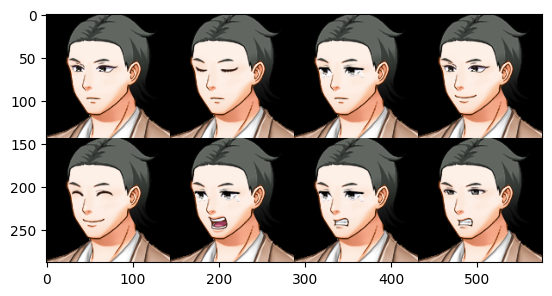

In [ ]:
img = cv2.imread('image0.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

In [ ]:
width=img2.shape[1]
height=img2.shape[0]
cx=width//4
cy=height//2
x=0
y=0
crops=[]
for i in range(2):
  for j in range(4):
    crops.append(img2[y:y+cy,x:x+cx])
    x+=cx
  y+=cy
  x=0


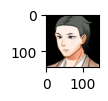

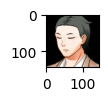

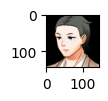

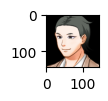

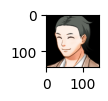

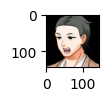

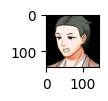

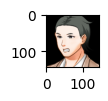

In [ ]:
for i in range(8):
     plt.subplot(1,8,i+1)
     plt.imshow(crops[i])
     plt.show()

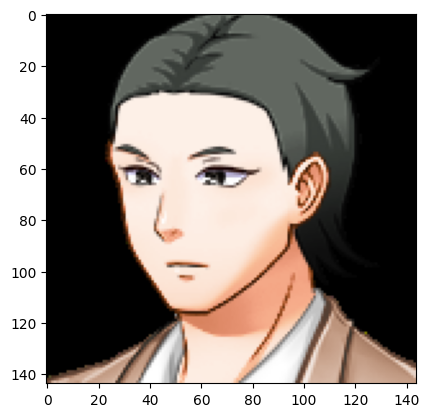

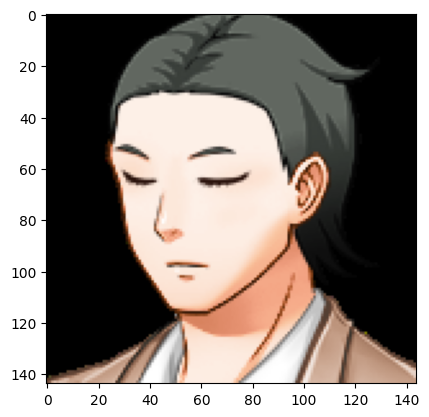

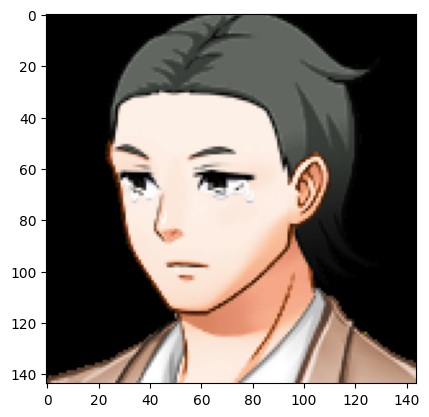

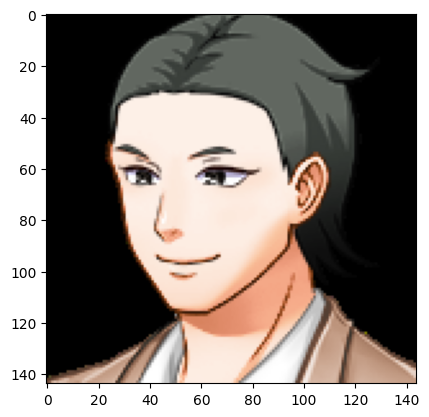

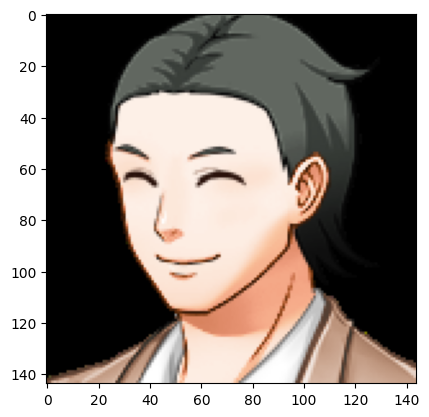

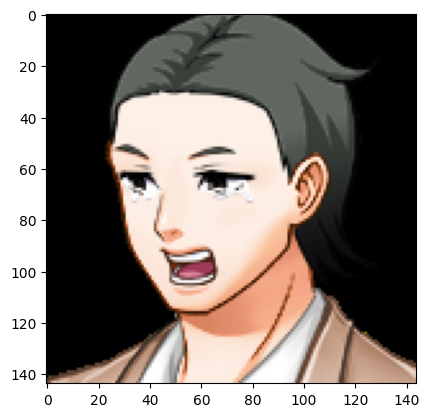

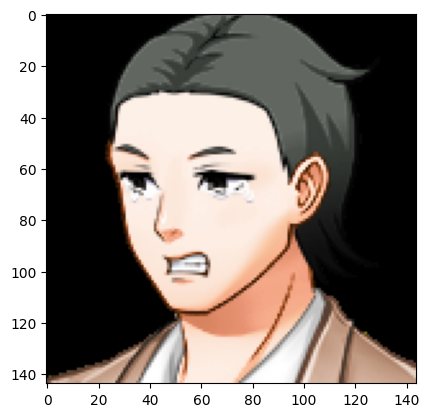

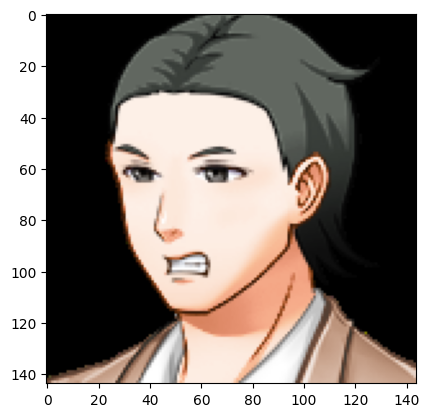

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in range(8):
  fig1 = plt.gcf()
  plt.imshow(crops[i])
  plt.show()
  plt.draw()
  fig1.savefig(f"crops{i}.jpg")


In [ ]:
import dlib

In [ ]:
detector = dlib.get_frontal_face_detector()

In [ ]:
rects=detector(img2,1)

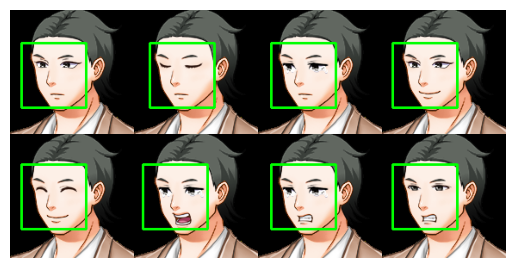

In [ ]:
for i in rects:
  x1=i.tl_corner().x
  y1=i.tl_corner().y
  x2=i.br_corner().x
  y2=i.br_corner().y
  res=cv2.rectangle(img2,(x1,y1),(x2,y2),(0,255,0),thickness=2)
  plt.imshow(img2)
plt.axis('off')
plt.show()

In [ ]:
!apt install -y cmake
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
--2023-05-04 17:46:24--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2.3’

shape_predictor_68_ 100%[===================>]  61.07M   160MB/s    in 0.4s    

2023-05-04 17:46:25 (160 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2.3’ saved [64040097/64040097]

bunzip2: Output file /content/shape_predictor_68_face_landmarks.dat already exists.


In [ ]:
predictor=dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

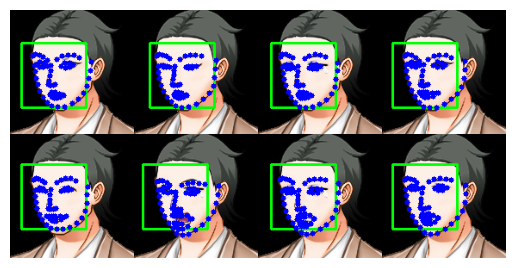

In [ ]:
for i in range(8):
   shape=predictor(img2,rects[i])
   shape_np = np.zeros((68, 2), dtype="int")
   for i in range(0,68):
       shape_np[i] =(shape.part(i).x,shape.part(i).y)
   for i, (x, y) in enumerate(shape_np):
          cv2.circle(img2,(x, y),3,(0, 0, 255),-1)


plt.imshow(img2)
plt.axis('off')
plt.show()